# Stacked Machine Learning

In [1]:
## IMPORTANT !

# In the first order need to set the number of CPU 
# for calculation before launching (depends on computer's number of cores)
n_jobs= 30

### Load libraries

In [2]:
#libraries
import pandas as pd
import numpy as np
import os
import sys
import shutil
import glob
import joblib
import warnings
from datetime import date, datetime

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
import scipy.stats as st

from nilearn import image as nli
from nilearn import plotting

#from mne.viz import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

import matplotlib.patches as mpatches
import copy


### Path to the tables folder

In [3]:
#path to folder with results
path_tab_res = '/media/hcs-psy-narun/Alina_results/Alina3/mainset_outputs/bootstrap_table/'
path_tab_res_cv = '/media/hcs-psy-narun/Alina_results/Alina3/mainset_outputs/cv_table/'

#### load results table

In [30]:
INDEXes=['r2','cor', 'mse', 'mae']

In [31]:
dct_bootstrap={}
dct_cv={}
for INDEX in INDEXes:
    dct_bootstrap[INDEX] ={}
    dct_cv[INDEX] ={}
print(dct_bootstrap)
print(dct_cv)

{'r2': {}, 'cor': {}, 'mse': {}, 'mae': {}}
{'r2': {}, 'cor': {}, 'mse': {}, 'mae': {}}


In [32]:
#dct_bootstrap={}
for INDEX in INDEXes:
    for i in sorted(glob.glob(path_tab_res+'BTSTRP_'+str(INDEX)+'*')):
        dct_bootstrap[INDEX][i.split('/')[-1].split('.')[0].split('_')[-1]] = pd.read_csv(i, index_col=0)

In [34]:
#dct_cv={}
for INDEX in INDEXes:
    for i in sorted(glob.glob(path_tab_res_cv+'CV_'+str(INDEX)+'*')):
        dct_cv[INDEX][i.split('/')[-1].split('.')[0].split('_')[-1]] = pd.read_csv(i, index_col=0)

# Bootstrap

In [36]:
#confidence intervals for bootstrap
CI_dct_bootstrap= {}
for INDEX in INDEXes:
    CI_dct_bootstrap[INDEX] = {}
    
    
    for KEY in dct_bootstrap[INDEX].keys():
        
        dataset = dct_bootstrap[INDEX][KEY]

        CI1, CI2, colss = [],[], []
        for col in dataset.columns:
            CI1 += [(st.t.interval(alpha=0.95, df=len(dataset[col])-1, loc=np.mean(dataset[col]), scale=np.std(dataset[col])))[0]]
            CI2 += [(st.t.interval(alpha=0.95, df=len(dataset[col])-1, loc=np.mean(dataset[col]), scale=np.std(dataset[col])))[1]]
            colss += [col]
        df_CI = pd.DataFrame({'CI1':CI1, 'CI2':CI2}, index=colss)#.sort_values(by='CI1', ascending=True)
        CI_dct_bootstrap[INDEX][KEY]=df_CI
        
        print(INDEX.upper()+' Confidence Intervals')
        print(KEY)
        display(df_CI)

R2 Confidence Intervals
eNet+eNet


,CI1,CI2
all,0.274027,0.373215
task,0.254202,0.353861
non-task,0.030914,0.104724
top-task,0.245270,0.344582


R2 Confidence Intervals
eNet+rf


,CI1,CI2
all,0.249521,0.336528
task,0.237094,0.327378
non-task,0.025756,0.099278
top-task,0.225256,0.317957


R2 Confidence Intervals
eNet+svr


,CI1,CI2
all,0.235140,0.348951
task,0.242501,0.349668
non-task,-0.000140,0.088608
top-task,0.239715,0.345924


R2 Confidence Intervals
eNet+xgb


,CI1,CI2
all,0.224706,0.333455
task,0.221036,0.330842
non-task,-0.026942,0.073051
top-task,0.217859,0.330429


R2 Confidence Intervals
eNet


,CI1,CI2
wm,0.186639,0.274740
lan,0.102795,0.184343
rel,0.051973,0.119360
mot,0.015667,0.064299
emo,-0.004660,0.054359
soc,0.018890,0.060536
gam,-0.005551,0.001822
rest-pca75,-0.000591,0.042314
surf,0.033971,0.092528
VolBrain,0.013799,0.058382


R2 Confidence Intervals
flat+eNet


,CI1,CI2
all,0.262515,0.356188
task,0.242381,0.329802
non-task,0.017856,0.095922
top-task,0.257710,0.349682


R2 Confidence Intervals
flat+rf


,CI1,CI2
all,0.180512,0.251285
task,0.170532,0.243004
non-task,0.030642,0.089958
top-task,0.183803,0.260796


R2 Confidence Intervals
flat+svr


,CI1,CI2
all,0.261666,0.372925
task,0.252982,0.360216
non-task,-0.007281,0.083551
top-task,0.249750,0.355480


R2 Confidence Intervals
flat+xgb


,CI1,CI2
all,0.203086,0.299971
task,0.205829,0.294013
non-task,-0.000066,0.076369
top-task,0.195028,0.293440


R2 Confidence Intervals
rf+eNet


,CI1,CI2
all,0.233515,0.336074
task,0.209503,0.312096
non-task,0.020356,0.092248
top-task,0.205979,0.306948


R2 Confidence Intervals
rf+rf


,CI1,CI2
all,0.199228,0.294504
task,0.198574,0.295183
non-task,0.015359,0.081933
top-task,0.186803,0.281863


R2 Confidence Intervals
rf+svr


,CI1,CI2
all,0.191880,0.312241
task,0.179469,0.297161
non-task,0.003842,0.084279
top-task,0.187810,0.294304


R2 Confidence Intervals
rf+xgb


,CI1,CI2
all,0.178496,0.289162
task,0.188862,0.299194
non-task,-0.030928,0.061877
top-task,0.174490,0.289326


R2 Confidence Intervals
rf


,CI1,CI2
wm,0.146163,0.229600
lan,0.079644,0.140637
rel,0.041067,0.102874
mot,0.004947,0.047010
emo,0.008722,0.055209
soc,0.018709,0.078511
gam,-0.006964,0.022128
rest-pca75,-0.010583,0.027644
surf,0.030936,0.084563
VolBrain,0.006679,0.054669


R2 Confidence Intervals
svr+eNet


,CI1,CI2
all,0.252735,0.357491
task,0.233698,0.336879
non-task,0.027322,0.108533
top-task,0.220824,0.325889


R2 Confidence Intervals
svr+rf


,CI1,CI2
all,0.222973,0.318869
task,0.210722,0.307161
non-task,0.028153,0.094287
top-task,0.195073,0.287864


R2 Confidence Intervals
svr+svr


,CI1,CI2
all,0.236628,0.348266
task,0.213995,0.329757
non-task,0.000919,0.086913
top-task,0.204293,0.317583


R2 Confidence Intervals
svr+xgb


,CI1,CI2
all,0.215299,0.323799
task,0.191276,0.307151
non-task,-0.011648,0.082502
top-task,0.199057,0.312675


R2 Confidence Intervals
svr


,CI1,CI2
wm,0.172278,0.276597
lan,0.051400,0.152310
rel,0.034435,0.122870
mot,0.013978,0.083412
emo,-0.004087,0.063355
soc,-0.008545,0.064326
gam,-0.027459,0.022871
rest-pca75,-0.020190,0.034947
surf,0.021725,0.082665
VolBrain,-0.004385,0.048071


R2 Confidence Intervals
xgb+eNet


,CI1,CI2
all,0.197981,0.301535
task,0.185958,0.289364
non-task,0.008607,0.074705
top-task,0.184061,0.281989


R2 Confidence Intervals
xgb+rf


,CI1,CI2
all,0.192113,0.277151
task,0.178706,0.265888
non-task,0.008988,0.068380
top-task,0.167201,0.248744


R2 Confidence Intervals
xgb+svr


,CI1,CI2
all,0.184056,0.297180
task,0.168938,0.286373
non-task,0.009960,0.088751
top-task,0.151749,0.258564


R2 Confidence Intervals
xgb+xgb


,CI1,CI2
all,0.159840,0.265445
task,0.145153,0.254046
non-task,-0.032286,0.057722
top-task,0.151630,0.252400


R2 Confidence Intervals
xgb


,CI1,CI2
wm,0.139467,0.239710
lan,0.053301,0.137934
rel,0.001736,0.083715
mot,-0.015477,0.047240
emo,-0.019893,0.036701
soc,0.009933,0.070798
gam,-0.026049,0.017566
rest-pca75,-0.020722,0.032754
surf,-0.004414,0.066406
VolBrain,-0.008299,0.049927


COR Confidence Intervals
eNet+eNet


,CI1,CI2
all,0.525123,0.615139
task,0.505874,0.599730
non-task,0.203196,0.326356
top-task,0.497228,0.591419


COR Confidence Intervals
eNet+rf


,CI1,CI2
all,0.502386,0.595825
task,0.488946,0.586020
non-task,0.196637,0.316881
top-task,0.475791,0.572170


COR Confidence Intervals
eNet+svr


,CI1,CI2
all,0.499012,0.593630
task,0.499395,0.594319
non-task,0.184979,0.311217
top-task,0.498432,0.592823


COR Confidence Intervals
eNet+xgb


,CI1,CI2
all,0.482862,0.578305
task,0.478088,0.576347
non-task,0.173821,0.294744
top-task,0.476296,0.575749


COR Confidence Intervals
eNet


,CI1,CI2
wm,0.433534,0.536080
lan,0.323701,0.439494
rel,0.234542,0.355800
mot,0.139457,0.266964
emo,0.103965,0.235019
soc,0.143206,0.274538
gam,-0.089348,0.049598
rest-pca75,0.085137,0.213475
surf,0.192110,0.317579
VolBrain,0.132864,0.253712


COR Confidence Intervals
flat+eNet


,CI1,CI2
all,0.513653,0.607320
task,0.495137,0.591238
non-task,0.187530,0.311226
top-task,0.508789,0.600280


COR Confidence Intervals
flat+rf


,CI1,CI2
all,0.437455,0.540218
task,0.422199,0.525940
non-task,0.187055,0.309605
top-task,0.434864,0.536625


COR Confidence Intervals
flat+svr


,CI1,CI2
all,0.518788,0.612337
task,0.508868,0.603729
non-task,0.174481,0.298430
top-task,0.507512,0.599759


COR Confidence Intervals
flat+xgb


,CI1,CI2
all,0.453113,0.553720
task,0.455196,0.554122
non-task,0.155765,0.279110
top-task,0.445106,0.545593


COR Confidence Intervals
rf+eNet


,CI1,CI2
all,0.486581,0.582939
task,0.461759,0.562005
non-task,0.179610,0.306346
top-task,0.457936,0.557184


COR Confidence Intervals
rf+rf


,CI1,CI2
all,0.449007,0.547430
task,0.448505,0.548463
non-task,0.165194,0.288760
top-task,0.435223,0.535686


COR Confidence Intervals
rf+svr


,CI1,CI2
all,0.464393,0.563842
task,0.443618,0.548982
non-task,0.181654,0.307338
top-task,0.447182,0.547256


COR Confidence Intervals
rf+xgb


,CI1,CI2
all,0.438846,0.538715
task,0.447612,0.547990
non-task,0.139995,0.266452
top-task,0.436534,0.538816


COR Confidence Intervals
rf


,CI1,CI2
wm,0.384774,0.493666
lan,0.287625,0.407955
rel,0.210656,0.332255
mot,0.099702,0.231917
emo,0.117711,0.246627
soc,0.158176,0.288294
gam,0.026684,0.162240
rest-pca75,0.036279,0.172353
surf,0.182472,0.306352
VolBrain,0.113494,0.243480


COR Confidence Intervals
svr+eNet


,CI1,CI2
all,0.506203,0.600449
task,0.486366,0.584092
non-task,0.204002,0.331167
top-task,0.474448,0.573731


COR Confidence Intervals
svr+rf


,CI1,CI2
all,0.473697,0.571298
task,0.461138,0.559641
non-task,0.187701,0.312714
top-task,0.443621,0.542920


COR Confidence Intervals
svr+svr


,CI1,CI2
all,0.497389,0.592556
task,0.479048,0.577145
non-task,0.187608,0.310935
top-task,0.468831,0.567965


COR Confidence Intervals
svr+xgb


,CI1,CI2
all,0.471392,0.570498
task,0.452227,0.554968
non-task,0.169745,0.295821
top-task,0.459529,0.559942


COR Confidence Intervals
svr


,CI1,CI2
wm,0.429352,0.532510
lan,0.271553,0.394457
rel,0.234494,0.353691
mot,0.168071,0.291370
emo,0.132795,0.254741
soc,0.125611,0.256751
gam,0.028657,0.161594
rest-pca75,0.069149,0.201960
surf,0.176494,0.300981
VolBrain,0.105011,0.235716


COR Confidence Intervals
xgb+eNet


,CI1,CI2
all,0.452071,0.551216
task,0.438098,0.540402
non-task,0.145678,0.276239
top-task,0.434555,0.534064


COR Confidence Intervals
xgb+rf


,CI1,CI2
all,0.440145,0.541237
task,0.424277,0.528149
non-task,0.137052,0.266069
top-task,0.410419,0.511324


COR Confidence Intervals
xgb+svr


,CI1,CI2
all,0.453157,0.551584
task,0.435117,0.540852
non-task,0.189378,0.316246
top-task,0.410910,0.513897


COR Confidence Intervals
xgb+xgb


,CI1,CI2
all,0.412941,0.516558
task,0.397472,0.505402
non-task,0.121786,0.254002
top-task,0.404013,0.503459


COR Confidence Intervals
xgb


,CI1,CI2
wm,0.382495,0.491846
lan,0.251208,0.373992
rel,0.168834,0.292920
mot,0.084591,0.219324
emo,0.067240,0.194729
soc,0.135774,0.273003
gam,0.006972,0.137623
rest-pca75,0.053022,0.183789
surf,0.121076,0.259346
VolBrain,0.095353,0.225754


MSE Confidence Intervals
eNet+eNet


,CI1,CI2
all,120.632154,144.345635
task,123.748555,148.931314
non-task,167.459180,197.860934
top-task,125.399010,150.852717


MSE Confidence Intervals
eNet+rf


,CI1,CI2
all,126.487292,150.517064
task,127.830081,153.422965
non-task,168.340482,199.062011
top-task,129.832693,155.576593


MSE Confidence Intervals
eNet+svr


,CI1,CI2
all,125.923446,151.400863
task,124.946305,150.833284
non-task,171.547711,202.992606
top-task,125.473210,151.593514


MSE Confidence Intervals
eNet+xgb


,CI1,CI2
all,128.503127,153.915850
task,128.438576,155.239897
non-task,175.705504,207.095236
top-task,128.634430,155.743324


MSE Confidence Intervals
eNet


,CI1,CI2
wm,136.975288,164.504689
lan,152.856774,182.791614
rel,163.065974,195.324281
mot,171.824367,204.479812
emo,174.246406,207.989503
soc,171.550119,204.883792
gam,179.182268,213.563949
rest-pca75,175.218870,208.590073
surf,168.201252,198.942061
VolBrain,172.787797,205.035284


MSE Confidence Intervals
flat+eNet


,CI1,CI2
all,123.152602,147.445258
task,127.147965,152.601987
non-task,169.297278,200.304874
top-task,123.856567,148.979856


MSE Confidence Intervals
flat+rf


,CI1,CI2
all,140.279649,167.015382
task,141.722058,169.158418
non-task,168.660544,199.641270
top-task,138.831493,165.952316


MSE Confidence Intervals
flat+svr


,CI1,CI2
all,121.342449,146.089623
task,123.022564,148.634380
non-task,172.490276,204.443515
top-task,123.635779,149.594702


MSE Confidence Intervals
flat+xgb


,CI1,CI2
all,133.586215,159.676600
task,133.718166,160.210974
non-task,172.712192,204.237665
top-task,134.776258,161.347804


MSE Confidence Intervals
rf+eNet


,CI1,CI2
all,127.698496,152.492306
task,131.547529,158.076929
non-task,169.333750,200.514359
top-task,132.317056,159.014461


MSE Confidence Intervals
rf+rf


,CI1,CI2
all,134.827736,160.249603
task,134.218273,160.878359
non-task,170.622460,202.241289
top-task,136.479815,163.541758


MSE Confidence Intervals
rf+svr


,CI1,CI2
all,133.121510,159.861444
task,134.963734,163.453615
non-task,171.257029,203.385218
top-task,134.854149,162.511372


MSE Confidence Intervals
rf+xgb


,CI1,CI2
all,136.820649,163.331602
task,134.550573,161.623575
non-task,176.565252,209.248352
top-task,136.409023,164.517834


MSE Confidence Intervals
rf


,CI1,CI2
wm,144.813620,173.458659
lan,158.802527,189.999093
rel,165.858629,197.895663
mot,174.342691,207.459178
emo,173.260883,206.189515
soc,170.160250,202.751142
gam,177.614213,211.412836
rest-pca75,177.453081,211.193694
surf,169.252608,200.051760
VolBrain,173.582794,206.367415


MSE Confidence Intervals
svr+eNet


,CI1,CI2
all,123.910211,148.308478
task,127.213881,152.799924
non-task,167.090366,198.186978
top-task,129.073580,155.627149


MSE Confidence Intervals
svr+rf


,CI1,CI2
all,130.109709,155.550208
task,131.984799,158.385504
non-task,168.213489,199.728214
top-task,135.319921,161.905219


MSE Confidence Intervals
svr+svr


,CI1,CI2
all,126.018902,151.149112
task,129.491565,155.740353
non-task,171.196540,203.493870
top-task,131.102794,158.447380


MSE Confidence Intervals
svr+xgb


,CI1,CI2
all,130.044489,156.122521
task,133.225749,160.912809
non-task,172.879895,205.111345
top-task,132.073480,159.462235


MSE Confidence Intervals
svr


,CI1,CI2
wm,137.690892,166.208494
lan,159.699220,192.285258
rel,164.427202,196.662096
mot,170.404675,202.443958
emo,173.819208,206.506474
soc,173.524107,207.503127
gam,179.309683,213.570596
rest-pca75,177.267834,211.828068
surf,169.774348,201.717342
VolBrain,174.956076,208.459970


MSE Confidence Intervals
xgb+eNet


,CI1,CI2
all,134.154822,159.767316
task,135.852447,162.837578
non-task,171.922628,203.680501
top-task,136.630568,163.898938


MSE Confidence Intervals
xgb+rf


,CI1,CI2
all,137.050770,162.855280
task,138.746638,166.014564
non-task,172.456895,204.322685
top-task,141.247885,169.149329


MSE Confidence Intervals
xgb+svr


,CI1,CI2
all,135.403059,162.087077
task,137.015525,165.577803
non-task,170.317180,202.252349
top-task,141.360628,170.081854


MSE Confidence Intervals
xgb+xgb


,CI1,CI2
all,140.733900,167.742157
task,142.484188,171.124319
non-task,176.774592,210.140187
top-task,142.309162,170.367318


MSE Confidence Intervals
xgb


,CI1,CI2
wm,144.280753,173.283618
lan,161.106372,193.354136
rel,170.860929,204.330637
mot,176.068670,209.666345
emo,177.647682,211.018149
soc,171.486746,204.662211
gam,179.696466,213.953683
rest-pca75,177.881322,211.733902
surf,173.963193,205.804593
VolBrain,175.360004,208.440637


MAE Confidence Intervals
eNet+eNet


,CI1,CI2
all,8.882017,9.787872
task,8.950163,9.883583
non-task,10.448662,11.506398
top-task,8.988379,9.928295


MAE Confidence Intervals
eNet+rf


,CI1,CI2
all,9.134058,10.053766
task,9.107715,10.056641
non-task,10.463988,11.530465
top-task,9.184217,10.135698


MAE Confidence Intervals
eNet+svr


,CI1,CI2
all,9.029335,9.966290
task,9.007823,9.946419
non-task,10.538314,11.613799
top-task,8.913693,9.871663


MAE Confidence Intervals
eNet+xgb


,CI1,CI2
all,9.105150,10.053415
task,9.083378,10.045824
non-task,10.740465,11.804067
top-task,9.027559,9.999771


MAE Confidence Intervals
eNet


,CI1,CI2
wm,9.369080,10.363679
lan,9.932379,10.971078
rel,10.190006,11.278227
mot,10.602140,11.691510
emo,10.648856,11.751996
soc,10.490157,11.597251
gam,10.758989,11.880944
rest-pca75,10.631268,11.734163
surf,10.466728,11.529056
VolBrain,10.575965,11.672772


MAE Confidence Intervals
flat+eNet


,CI1,CI2
all,9.025652,9.930636
task,9.112836,10.053645
non-task,10.482245,11.547836
top-task,8.965173,9.899896


MAE Confidence Intervals
flat+rf


,CI1,CI2
all,9.572301,10.557390
task,9.613678,10.609976
non-task,10.478686,11.543610
top-task,9.534459,10.516834


MAE Confidence Intervals
flat+svr


,CI1,CI2
all,8.869315,9.782158
task,8.863562,9.802307
non-task,10.540403,11.623295
top-task,8.846834,9.798483


MAE Confidence Intervals
flat+xgb


,CI1,CI2
all,9.344292,10.301169
task,9.356372,10.320663
non-task,10.629287,11.699402
top-task,9.370396,10.338349


MAE Confidence Intervals
rf+eNet


,CI1,CI2
all,9.158051,10.083341
task,9.236553,10.195747
non-task,10.498957,11.568587
top-task,9.271093,10.235919


MAE Confidence Intervals
rf+rf


,CI1,CI2
all,9.460040,10.402298
task,9.361160,10.327017
non-task,10.514652,11.593230
top-task,9.371358,10.360247


MAE Confidence Intervals
rf+svr


,CI1,CI2
all,9.303702,10.261057
task,9.312272,10.296356
non-task,10.526286,11.609572
top-task,9.334753,10.315818


MAE Confidence Intervals
rf+xgb


,CI1,CI2
all,9.535319,10.485448
task,9.320573,10.297090
non-task,10.668735,11.764966
top-task,9.314003,10.315576


MAE Confidence Intervals
rf


,CI1,CI2
wm,9.660734,10.679699
lan,10.096344,11.157376
rel,10.333562,11.417885
mot,10.623057,11.724054
emo,10.635420,11.727424
soc,10.465373,11.553626
gam,10.710587,11.826703
rest-pca75,10.723478,11.832969
surf,10.494280,11.563137
VolBrain,10.599887,11.701947


MAE Confidence Intervals
svr+eNet


,CI1,CI2
all,8.952040,9.882471
task,9.050379,10.003549
non-task,10.439235,11.499528
top-task,9.057985,10.028975


MAE Confidence Intervals
svr+rf


,CI1,CI2
all,9.179680,10.136555
task,9.210161,10.184429
non-task,10.407036,11.490618
top-task,9.337688,10.313681


MAE Confidence Intervals
svr+svr


,CI1,CI2
all,9.075280,10.008067
task,9.140472,10.099429
non-task,10.508220,11.594331
top-task,9.113364,10.095298


MAE Confidence Intervals
svr+xgb


,CI1,CI2
all,9.158447,10.115456
task,9.205740,10.192916
non-task,10.562245,11.646110
top-task,9.177470,10.156017


MAE Confidence Intervals
svr


,CI1,CI2
wm,9.303952,10.319019
lan,10.057904,11.129705
rel,10.208890,11.301251
mot,10.493945,11.579064
emo,10.598939,11.706038
soc,10.586721,11.698779
gam,10.752768,11.874700
rest-pca75,10.682468,11.798210
surf,10.448923,11.538231
VolBrain,10.572331,11.689339


MAE Confidence Intervals
xgb+eNet


,CI1,CI2
all,9.437950,10.376938
task,9.413778,10.384107
non-task,10.576131,11.655648
top-task,9.433662,10.415421


MAE Confidence Intervals
xgb+rf


,CI1,CI2
all,9.464711,10.428588
task,9.446356,10.441136
non-task,10.558321,11.647807
top-task,9.543097,10.549250


MAE Confidence Intervals
xgb+svr


,CI1,CI2
all,9.419961,10.376194
task,9.386491,10.375738
non-task,10.480307,11.565317
top-task,9.568611,10.578216


MAE Confidence Intervals
xgb+xgb


,CI1,CI2
all,9.638152,10.606448
task,9.565178,10.572099
non-task,10.625865,11.738675
top-task,9.641019,10.634681


MAE Confidence Intervals
xgb


,CI1,CI2
wm,9.564808,10.596314
lan,10.131836,11.211741
rel,10.524616,11.618005
mot,10.667665,11.768994
emo,10.786879,11.883388
soc,10.538829,11.626192
gam,10.789114,11.908597
rest-pca75,10.685382,11.799116
surf,10.655216,11.735436
VolBrain,10.675030,11.776687


## Bootstrap plot

##### reorganize tables for plotting

In [37]:
#stack into one table for plot

dct_plot_tab = {}

for INDEX in INDEXes:
    
    dct_plot_tab[INDEX] = {}
    
    for model in dct_bootstrap[INDEX]['eNet+eNet'].columns:

        #combine into one table by type of model
        v1 = []
        v2 = []
        dfdf = pd.DataFrame()
        for key in dct_bootstrap[INDEX].keys():
            if len(key.split('+')) >=2:
                v1 += [key.split('+')[0]]
                v2 += [key.split('+')[1]]
                dfdf[key] = dct_bootstrap[INDEX][key][model]                 

        #change names to upper case        
        V1=[]
        for i in v1:
            if i in ['svr', 'rf', 'xgb']:
                V1 += [i.upper()]
            else: 
                V1 += [i]    
        V2=[]
        for i in v2:

            if i in ['svr', 'rf', 'xgb']:
                V2 += [i.upper()]
            else: 
                V2 += [i]    

        #multi-index        
        collumnss = pd.MultiIndex.from_tuples(list(zip( V1,V2)), names=["single", "stack"])
        dfdf.columns=collumnss


        #reorganize table into long one for easy plotting

        dct_t2 = {}
        for col in dfdf.columns:
            nums = dfdf[col].values
            inds1 = np.full(len(dfdf[col].values), col[0])
            inds2 = np.full(len(dfdf[col].values), col[1])
            dct_t2[('_'.join(col))] = pd.DataFrame({'$R^2$': nums, 'Single Modality \nAlgorithm':inds1, 
                                                    'Stacking Algorithm':inds2})

        #table for plot
        dfdf2 = dct_t2[sorted(dct_t2.keys())[0]]
        for key in sorted(dct_t2.keys())[1:]:
            dfdf2 = pd.concat([dfdf2, dct_t2[key]], axis=0, ignore_index=True)
        #display(dfdf2)

        dct_plot_tab[INDEX][model]=dfdf2

##### Bootstrap plot

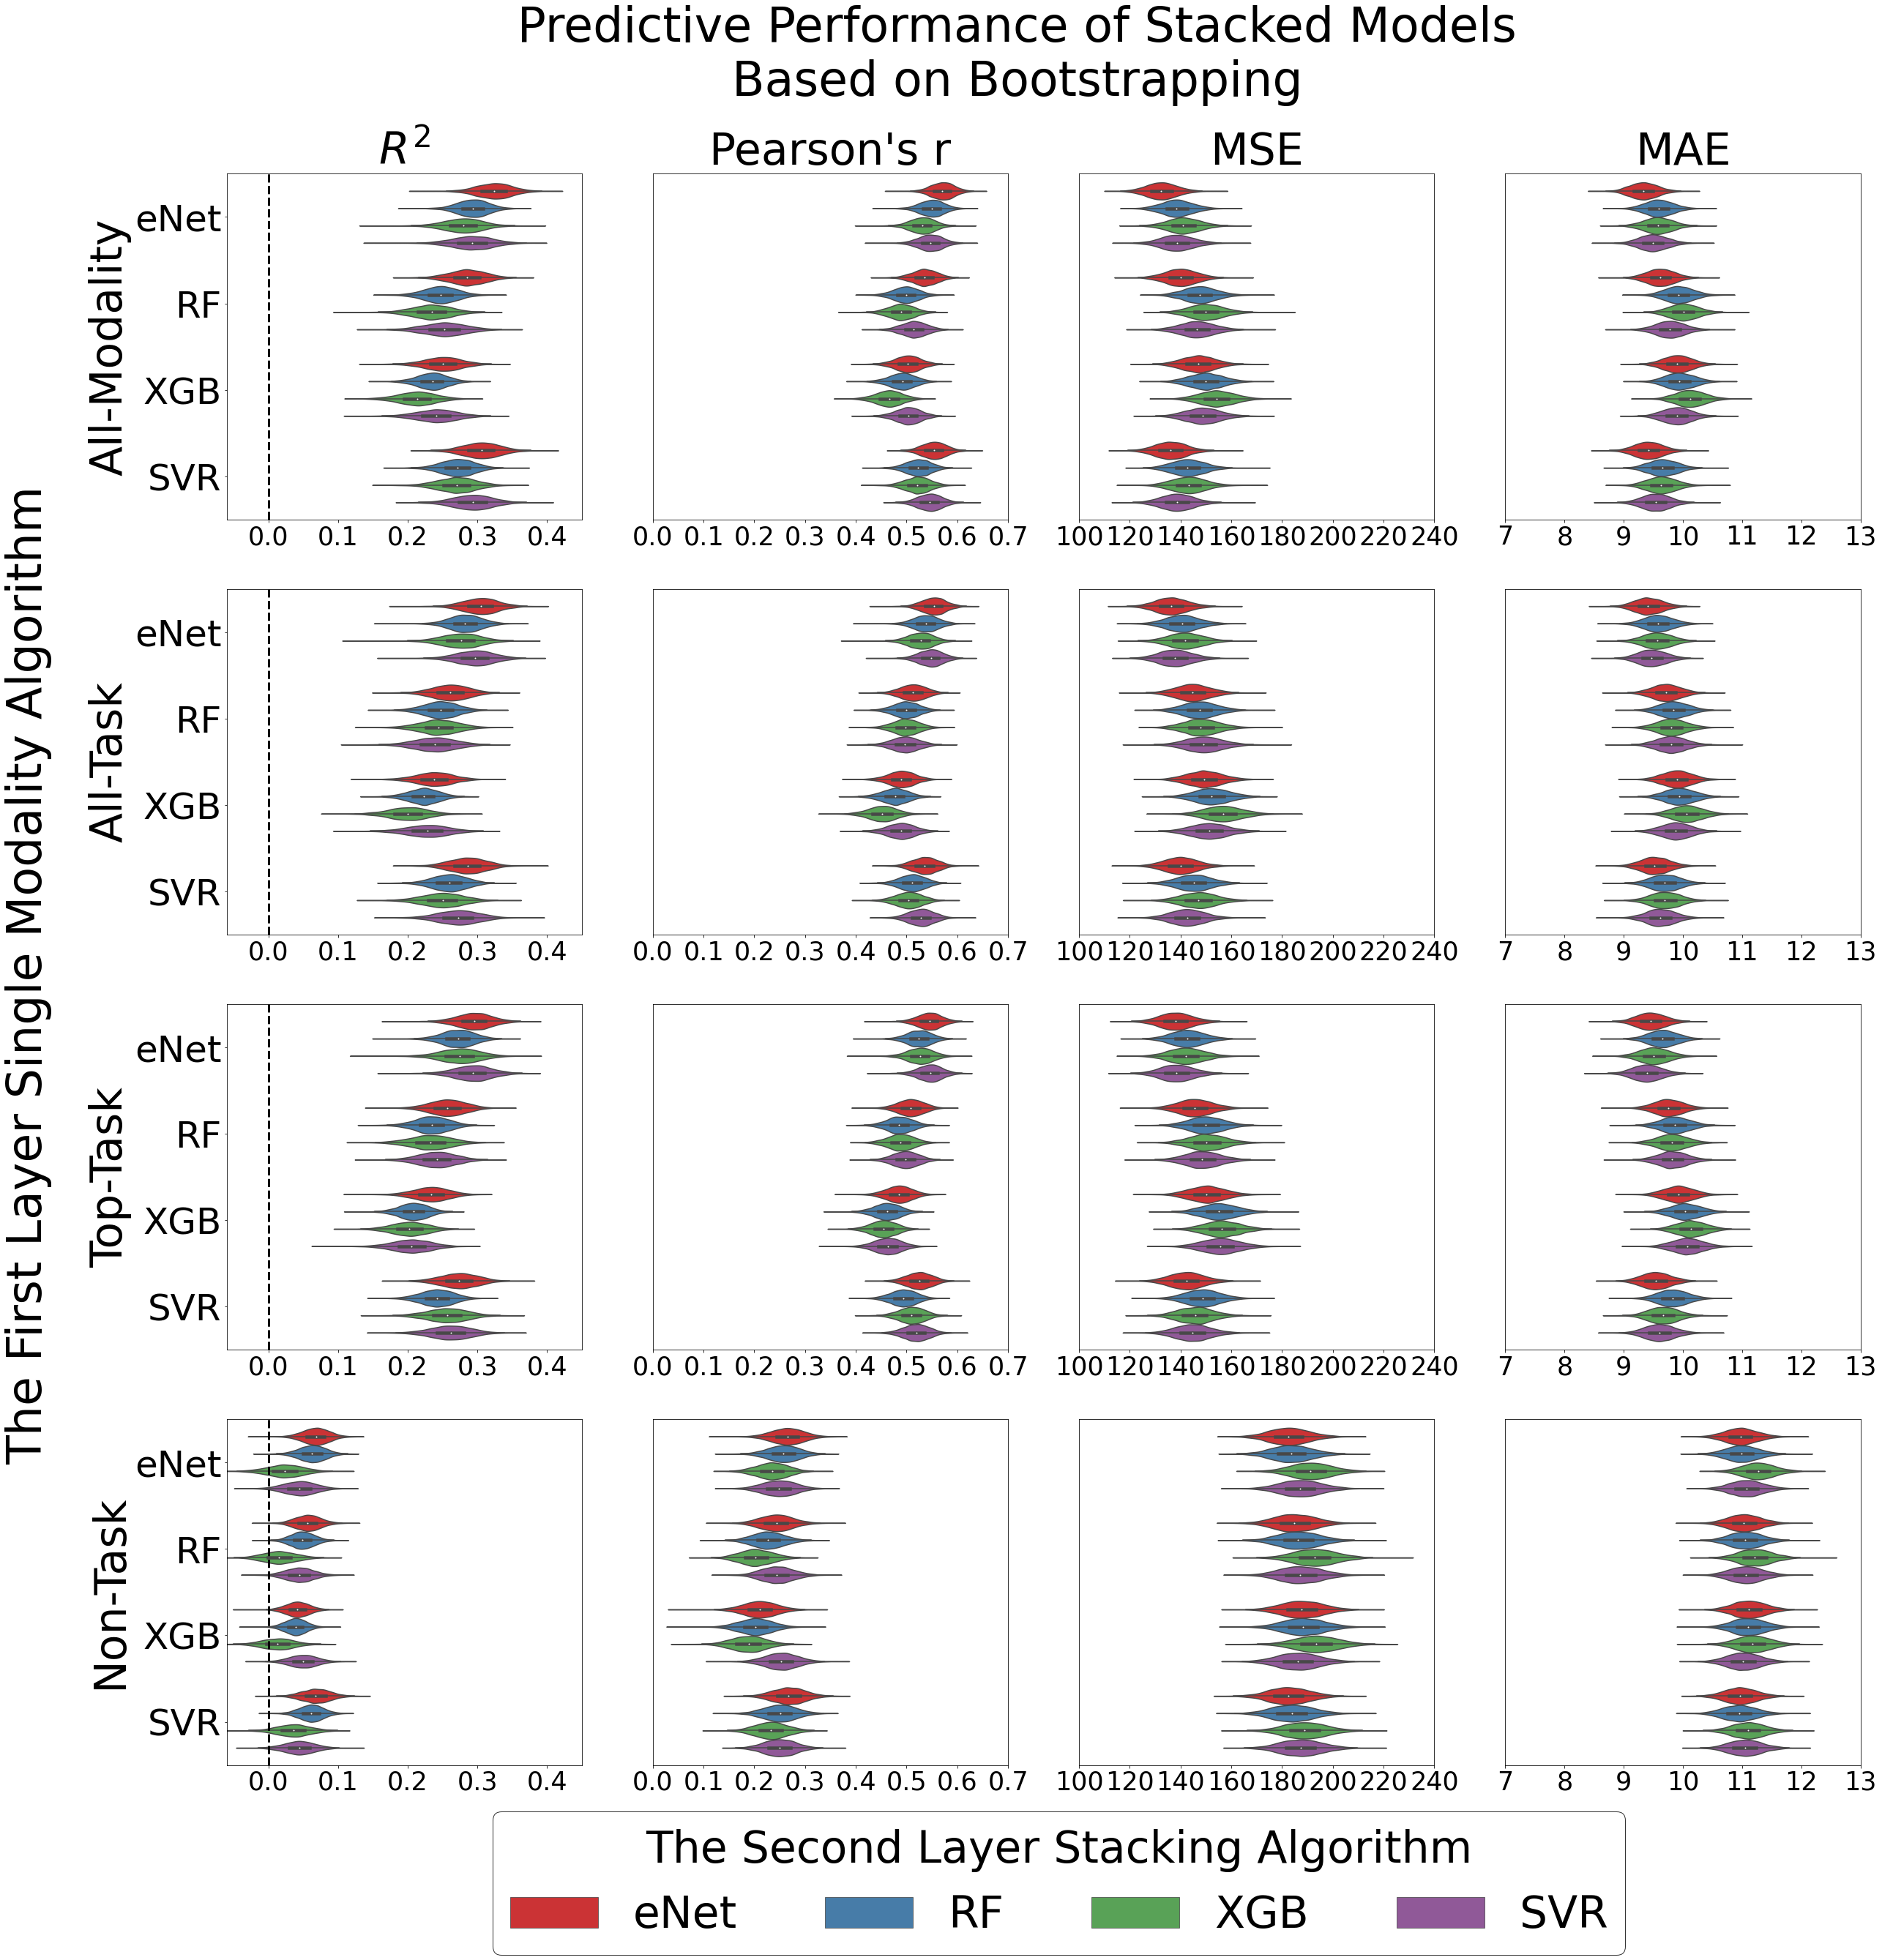

In [136]:
fig = plt.figure(figsize=(40,40))
palette = "Set1"
font1=28
font2=35
font3=50

plt.suptitle(" Predictive Performance of Stacked Models \nBased on Bootstrapping", fontsize=65, y=0.96)



for INDEX, k in zip(INDEXes, range(4)):
    k=k+1
    
    for modtype, y in zip(['all', 'task','top-task', 'non-task'], [0,4,8,12]):
            if INDEX in ['mae']:
                lim = (7,13)
            if INDEX in ['r2']:
                lim = (-0.06, 0.45)
            if INDEX in ['cor']:
                lim = (0,0.7)
            if INDEX in ['mse']:
                lim = (100,240)
             
            plt.subplot(4,4,k+y) #1

            if y==0:
                if INDEX == 'cor':
                    plt.title(str("Pearson's r"), fontsize=60) 
                elif INDEX == 'r2':
                    plt.title(str('$R^2$'), fontsize=60) 
                else:
                    plt.title(str(INDEX).upper(), fontsize=60)  

            sns.violinplot(x='$R^2$', y='Single Modality \nAlgorithm', hue='Stacking Algorithm', 
                           data = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']!='flat'], 
                           palette=palette,
                           order=['eNet', 'RF', 'XGB','SVR'],
                           hue_order=['eNet', 'RF', 'XGB','SVR'])
            plt.xlim(lim)
            plt.xticks(fontsize=font2)
            plt.xlabel('',fontsize=font3)

            if k+y in [1,5,9,13]:
                plt.yticks(fontsize=font3)
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)
                if modtype=='all':
                    plt.ylabel('All-Modality',fontsize=60)
                if modtype=='task':
                    plt.ylabel('All-Task',fontsize=60)
                if modtype=='top-task':
                    plt.ylabel('Top-Task',fontsize=60)
                if modtype=='non-task':
                    plt.ylabel('Non-Task',fontsize=60)
            else:
                plt.ylabel('',fontsize=font3)
                plt.yticks([],fontsize=font3)

            if k+y==16:
                plt.legend(loc='upper right', fontsize=60, bbox_to_anchor=(0.4, -0.07), 
                       title="The Second Layer Stacking Algorithm", title_fontsize=60, ncol=4, edgecolor='black')
            else:
                plt.legend([],[], frameon=False)





#fig.tight_layout(pad=1)

#fig.supxlabel('$R^2$', fontsize=50)
fig.supylabel('The First Layer Single Modality Algorithm', fontsize=65)

plt.show()

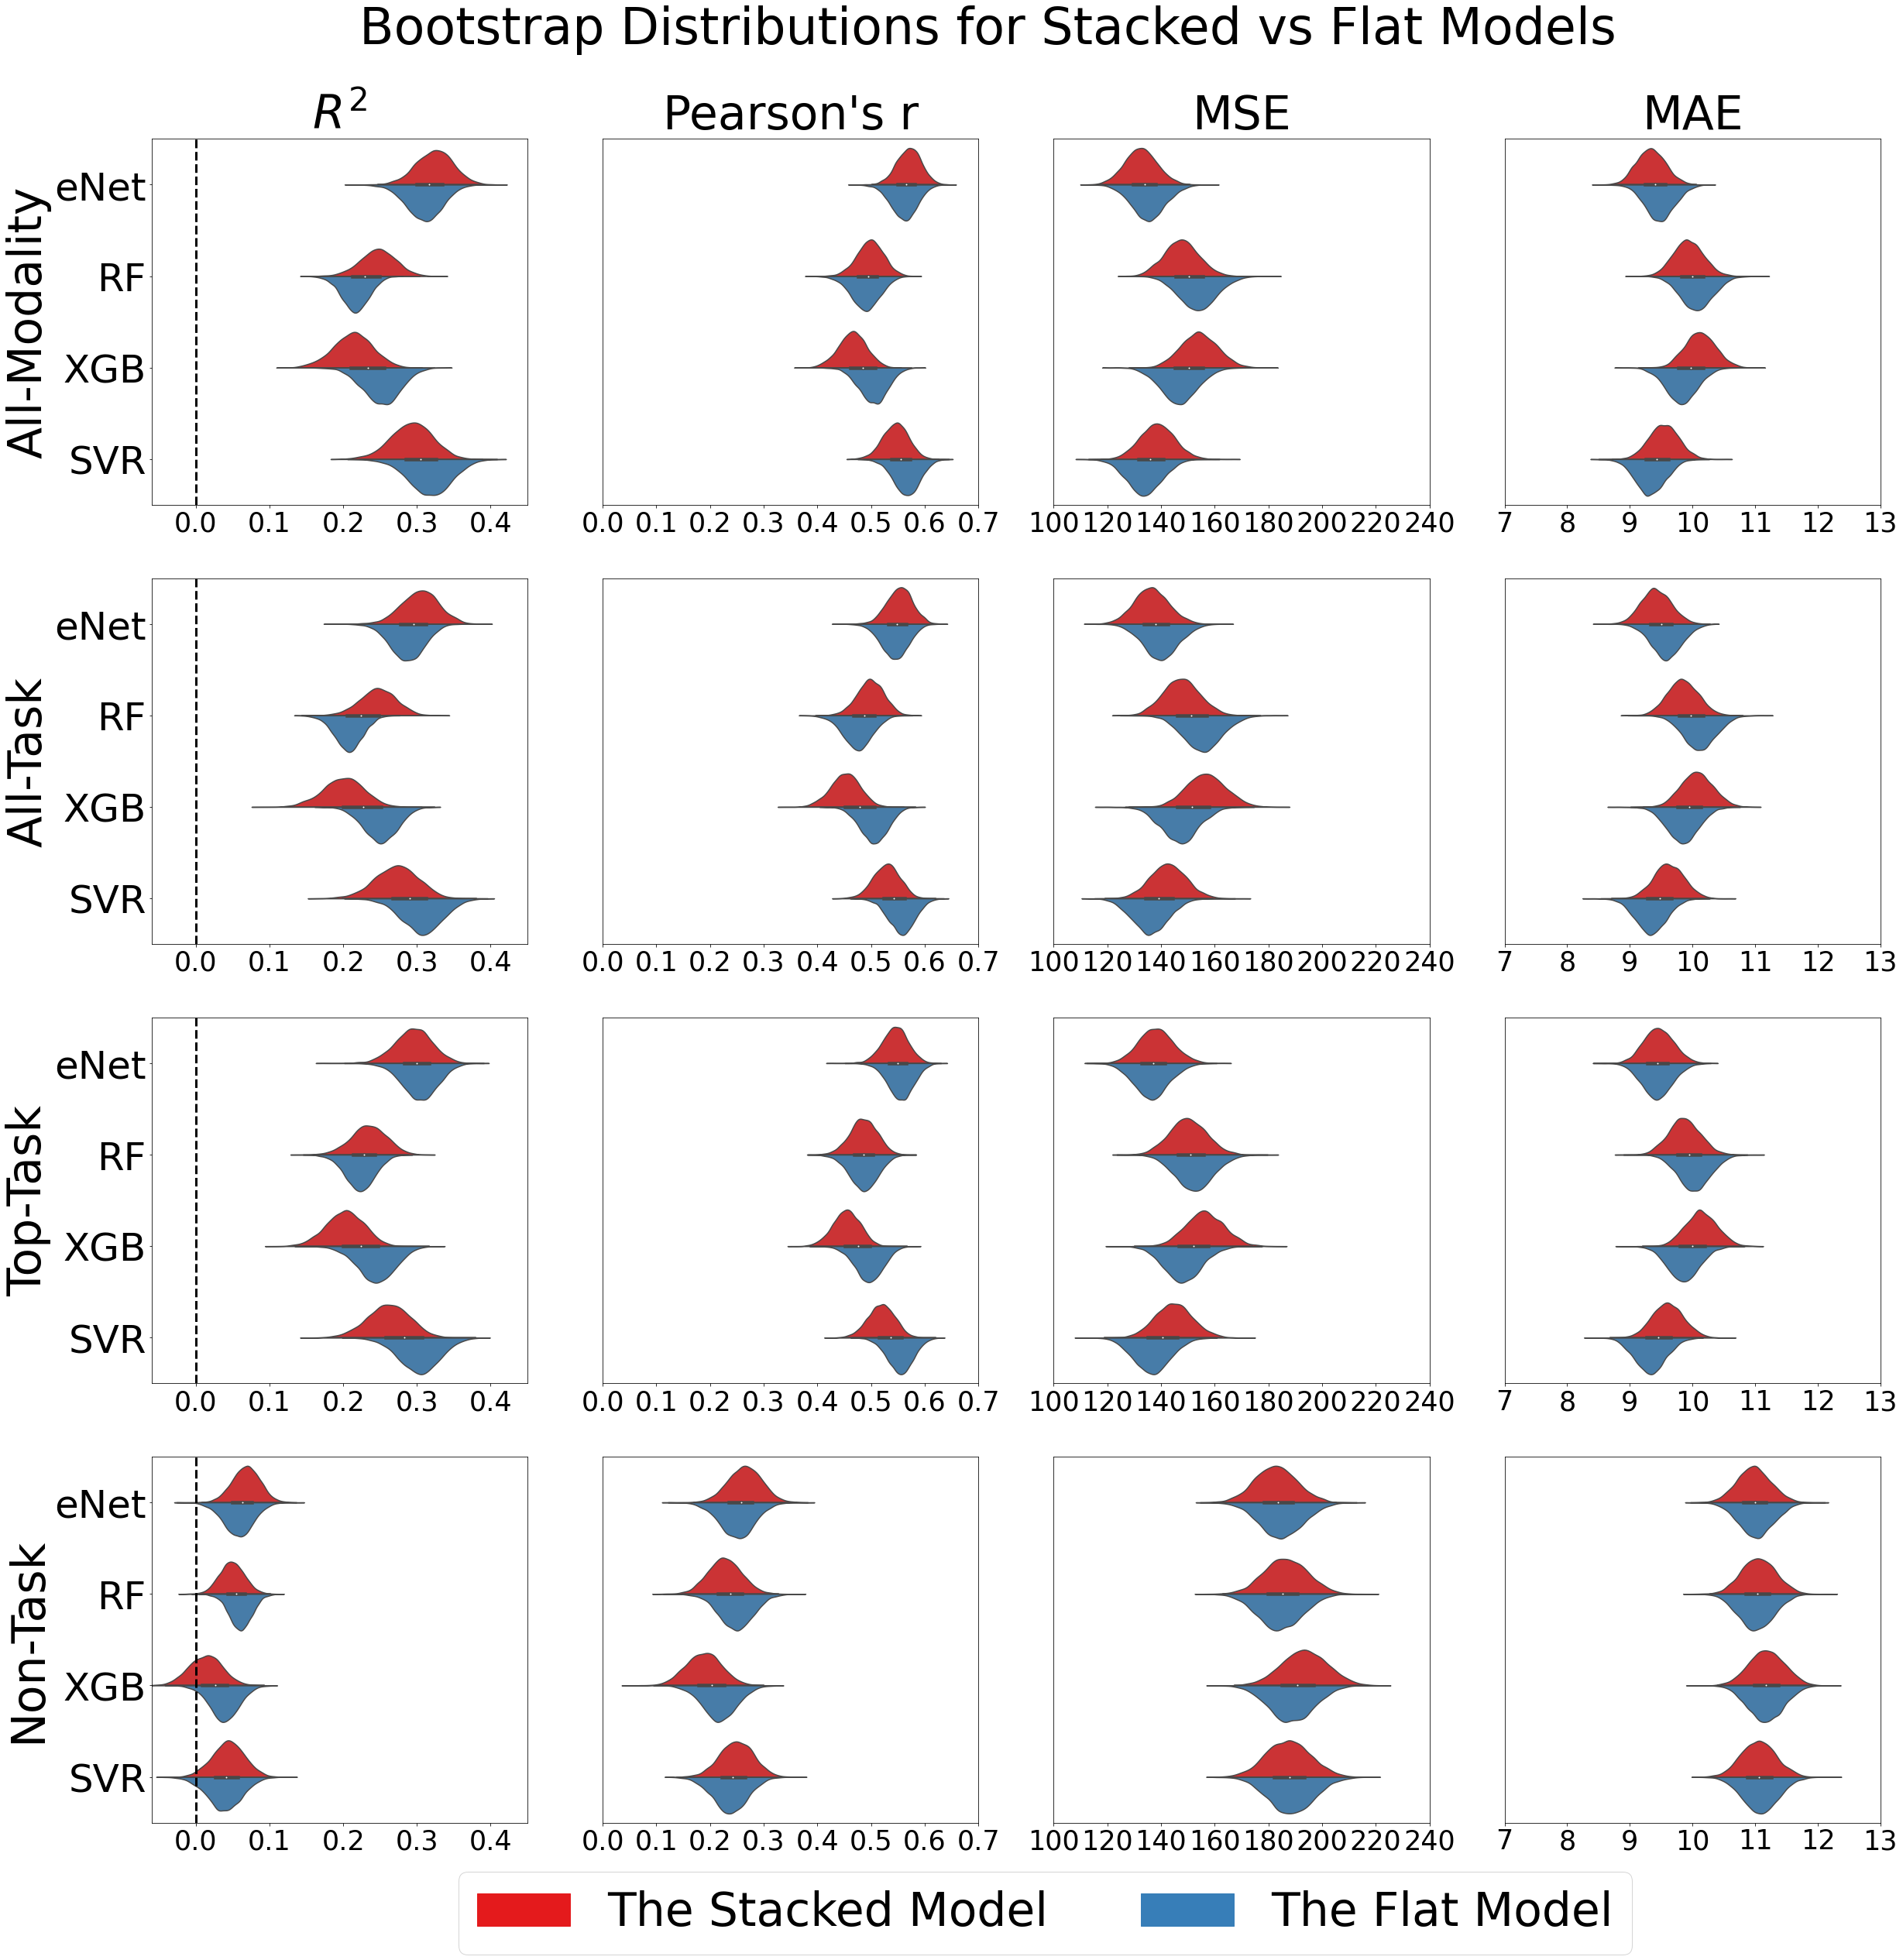

In [141]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(40,40))
palette = "Set1"
font1=28
font2=35
font3=50

plt.suptitle('Bootstrap Distributions for Stacked vs Flat Models', fontsize=65, y=0.94)



for INDEX, k in zip(INDEXes, range(4)):
    k=k+1
    
    for modtype, y in zip(['all', 'task','top-task', 'non-task'], [0,4,8,12]):
            if INDEX in ['mae']:
                lim = (7,13)
            if INDEX in ['r2']:
                lim = (-0.06, 0.45)
            if INDEX in ['cor']:
                lim = (0,0.7)
            if INDEX in ['mse']:
                lim = (100,240)
             
            plt.subplot(4,4,k+y) #1

            if y==0:
                if INDEX == 'cor':
                    plt.title(str("Pearson's r"), fontsize=60) 
                elif INDEX == 'r2':
                    plt.title(str('$R^2$'), fontsize=60) 
                else:
                    plt.title(str(INDEX).upper(), fontsize=60)  

            data1 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='flat']
            data2 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='RF'][dct_plot_tab[INDEX][modtype]['Stacking Algorithm']=='RF']
            data3 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='SVR'][dct_plot_tab[INDEX][modtype]['Stacking Algorithm']=='SVR']
            data4 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='XGB'][dct_plot_tab[INDEX][modtype]['Stacking Algorithm']=='XGB']
            data5 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='eNet'][dct_plot_tab[INDEX][modtype]['Stacking Algorithm']=='eNet']

            Data = pd.concat([data2, data3, data4, data5, data1], axis=0, ignore_index=True)
            Data = Data.sort_values(by=['Stacking Algorithm','Single Modality \nAlgorithm'])

            for i in Data['Single Modality \nAlgorithm'].index:
                if Data.loc[i, 'Single Modality \nAlgorithm'] != 'flat':
                    Data.loc[i, 'Single Modality \nAlgorithm'] = 'one'

            sns.violinplot(x='$R^2$', y='Stacking Algorithm', hue='Single Modality \nAlgorithm', 
                           data = Data, 
                           palette=palette, split=True,
                          order=['eNet', 'RF', 'XGB','SVR'])
            
            plt.xlim(lim)
            plt.xticks(fontsize=font2)
            plt.xlabel('',fontsize=font3)

            if k+y in [1,5,9,13]:
                plt.yticks(fontsize=font3)
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)
                if modtype=='all':
                    plt.ylabel('All-Modality',fontsize=60)
                if modtype=='task':
                    plt.ylabel('All-Task',fontsize=60)
                if modtype=='top-task':
                    plt.ylabel('Top-Task',fontsize=60)
                if modtype=='non-task':
                    plt.ylabel('Non-Task',fontsize=60)
            else:
                plt.ylabel('',fontsize=font3)
                plt.yticks([],fontsize=font3)

            if k+y==16:
                plt.legend(handles=[mpatches.Patch(color=sns.color_palette("Set1")[0], label='The Stacked Model'),
                                    mpatches.Patch(color=sns.color_palette("Set1")[1], label='The Flat Model')],
                           bbox_to_anchor=(0.4, -0.07), fontsize=60, ncol=2)
            else:
                plt.legend([],[], frameon=False)





#fig.tight_layout(pad=1)

#fig.supxlabel('$R^2$', fontsize=50)
#fig.supylabel('The First Layer Single Modality Algorithm', fontsize=65)

plt.show()

# CV

##### reorganize tables for plotting

In [107]:
#stack into one table for plot
dct_cv_plot_stacked = {}

for INDEX in INDEXes:
    
    dct_cv_plot_stacked[INDEX] = {}
    
    for model in dct_cv[INDEX]['eNet+eNet'].columns:
        
        #combine into one table by type of model
        v1 = []
        v2 = []
        dfdf = pd.DataFrame()
        for key in dct_cv[INDEX].keys():
            if model in dct_cv[INDEX]['eNet+eNet'].columns[1:] and 'flat' not in key:
                if len(key.split('+')) >=2:
                    v1 += [key.split('+')[0]]
                    v2 += [key.split('+')[1]]
                    dfdf[key] = dct_cv[INDEX][key][model]
            if dct_cv[INDEX]['eNet+eNet'].columns[0] in model:
                if len(key.split('+')) >=2:
                    v1 += [key.split('+')[0]]
                    v2 += [key.split('+')[1]]
                    dfdf[key] = dct_cv[INDEX][key][model]            

        V1=[]
        for i in v1:
            if i in ['svr', 'rf', 'xgb']:
                V1 += [i.upper()]
            else: 
                V1 += [i]    
        V2=[]
        for i in v2:
            if i in ['svr', 'rf', 'xgb']:
                V2 += [i.upper()]
            else: 
                V2 += [i]    

        #multi-index        
        collumnss = pd.MultiIndex.from_tuples(list(zip( V1,V2)), names=["single", "stack"])
        dfdf.columns=collumnss


        #reorganize table into long one for easy plotting

        dct_t2 = {}
        for col in dfdf.columns:
            nums = dfdf[col].values
            inds1 = np.full(len(dfdf[col].values), col[0])
            inds2 = np.full(len(dfdf[col].values), col[1])
            dct_t2[('_'.join(col))] = pd.DataFrame({'$R^2$': nums, 'Single Modality \nAlgorithm':inds1, 
                                                    'Stacking Algorithm':inds2})

        #table for plot
        dfdf2 = dct_t2[sorted(dct_t2.keys())[0]]
        for key in sorted(dct_t2.keys())[1:]:
            dfdf2 = pd.concat([dfdf2, dct_t2[key]], axis=0, ignore_index=True)
        #display(dfdf2)

        dct_cv_plot_stacked[INDEX][model]=dfdf2

## CV plotting

###### CV stacked models

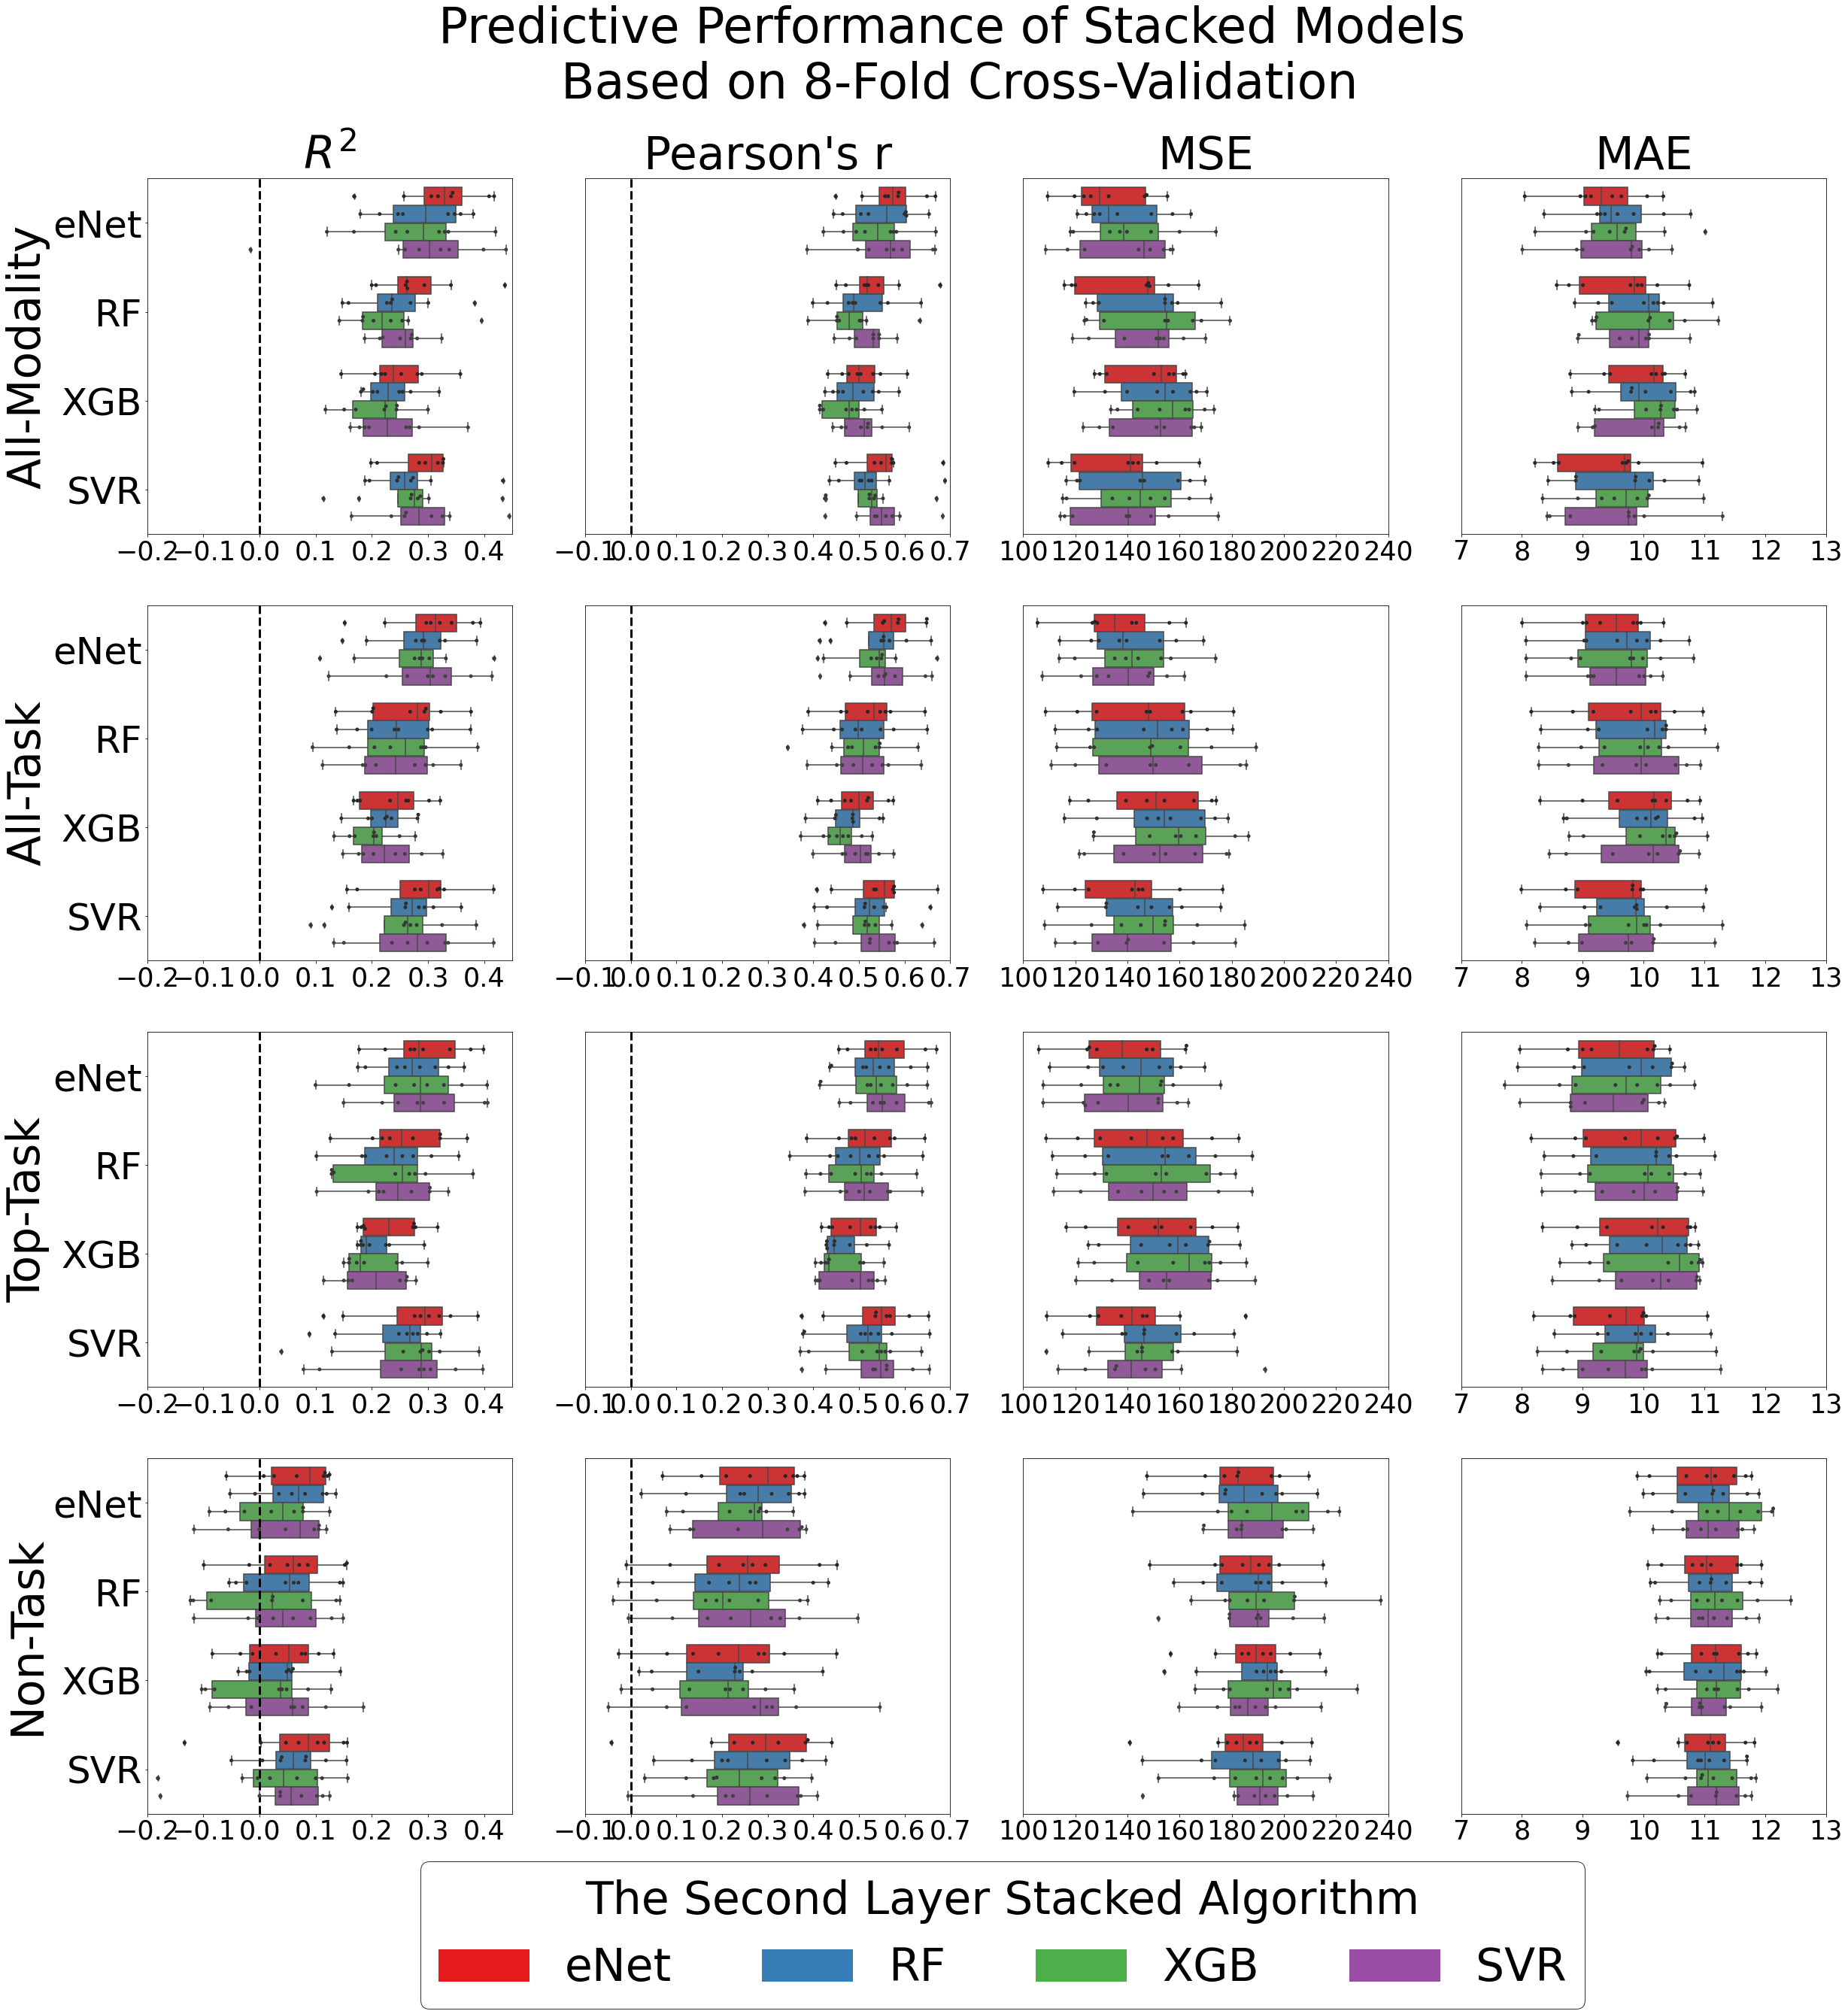

In [140]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(40,40))
palette = "Set1"
font1=28
font2=35
font3=50

plt.suptitle('Predictive Performance of Stacked Models \nBased on 8-Fold Cross-Validation', fontsize=65, y=0.96)



for INDEX, k in zip(INDEXes, range(4)):
    k=k+1
    
    for modtype, y in zip(['all', 'task','top-task', 'non-task'], [0,4,8,12]):
            if INDEX in ['mae']:
                lim = (7,13)
            if INDEX in ['r2']:
                lim = (-0.2, 0.45)
            if INDEX in ['cor']:
                lim = (-0.1,0.7)
            if INDEX in ['mse']:
                lim = (100,240)
             
            plt.subplot(4,4,k+y) #1

            if y==0:
                if INDEX == 'cor':
                    plt.title(str("Pearson's r"), fontsize=60) 
                elif INDEX == 'r2':
                    plt.title(str('$R^2$'), fontsize=60) 
                else:
                    plt.title(str(INDEX).upper(), fontsize=60)  

            sns.boxplot(x='$R^2$', y='Single Modality \nAlgorithm', 
                        hue='Stacking Algorithm', 
                        data = dct_cv_plot_stacked[INDEX][modtype][dct_cv_plot_stacked[INDEX][modtype]['Single Modality \nAlgorithm']!='flat'],
                        orient="h", palette=palette,
                        order=['eNet', 'RF', 'XGB','SVR'], hue_order=['eNet', 'RF', 'XGB','SVR'])
            sns.swarmplot(x='$R^2$', y='Single Modality \nAlgorithm', 
                          hue='Stacking Algorithm', 
                          data = dct_cv_plot_stacked[INDEX][modtype][dct_cv_plot_stacked[INDEX][modtype]['Single Modality \nAlgorithm']!='flat'],   
                          color=".25", orient="h", dodge=True,
                          order=['eNet', 'RF', 'XGB','SVR'], hue_order=['eNet', 'RF', 'XGB','SVR'])
            
            
            
            plt.xlim(lim)
            plt.xticks(fontsize=font2)
            plt.xlabel('',fontsize=font3)

            if k+y in [1,5,9,13]:
                plt.yticks(fontsize=font3)
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)
                if modtype=='all':
                    plt.ylabel('All-Modality',fontsize=60)
                if modtype=='task':
                    plt.ylabel('All-Task',fontsize=60)
                if modtype=='top-task':
                    plt.ylabel('Top-Task',fontsize=60)
                if modtype=='non-task':
                    plt.ylabel('Non-Task',fontsize=60)
            else:
                plt.ylabel('',fontsize=font3)
                plt.yticks([],fontsize=font3)
                
            if k+y in [2,6,10,14]:
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)

            if k+y==16:
                plt.legend(handles=[mpatches.Patch(color=sns.color_palette("Set1")[0], label='eNet'), 
                    mpatches.Patch(color=sns.color_palette("Set1")[1], label='RF'), 
                    mpatches.Patch(color=sns.color_palette("Set1")[2], label='XGB'), 
                    mpatches.Patch(color=sns.color_palette("Set1")[3], label='SVR')], 
                    fontsize=60, bbox_to_anchor=(0.4, -0.07), 
                    title="The Second Layer Stacked Algorithm", title_fontsize=60, ncol=4, edgecolor='black')
            else:
                plt.legend([],[], frameon=False)





#fig.tight_layout(pad=1)

#fig.supxlabel('$R^2$', fontsize=50)
#fig.supylabel('The First Layer Single Modality Algorithm', fontsize=65)

plt.show()

###### CV single modality models

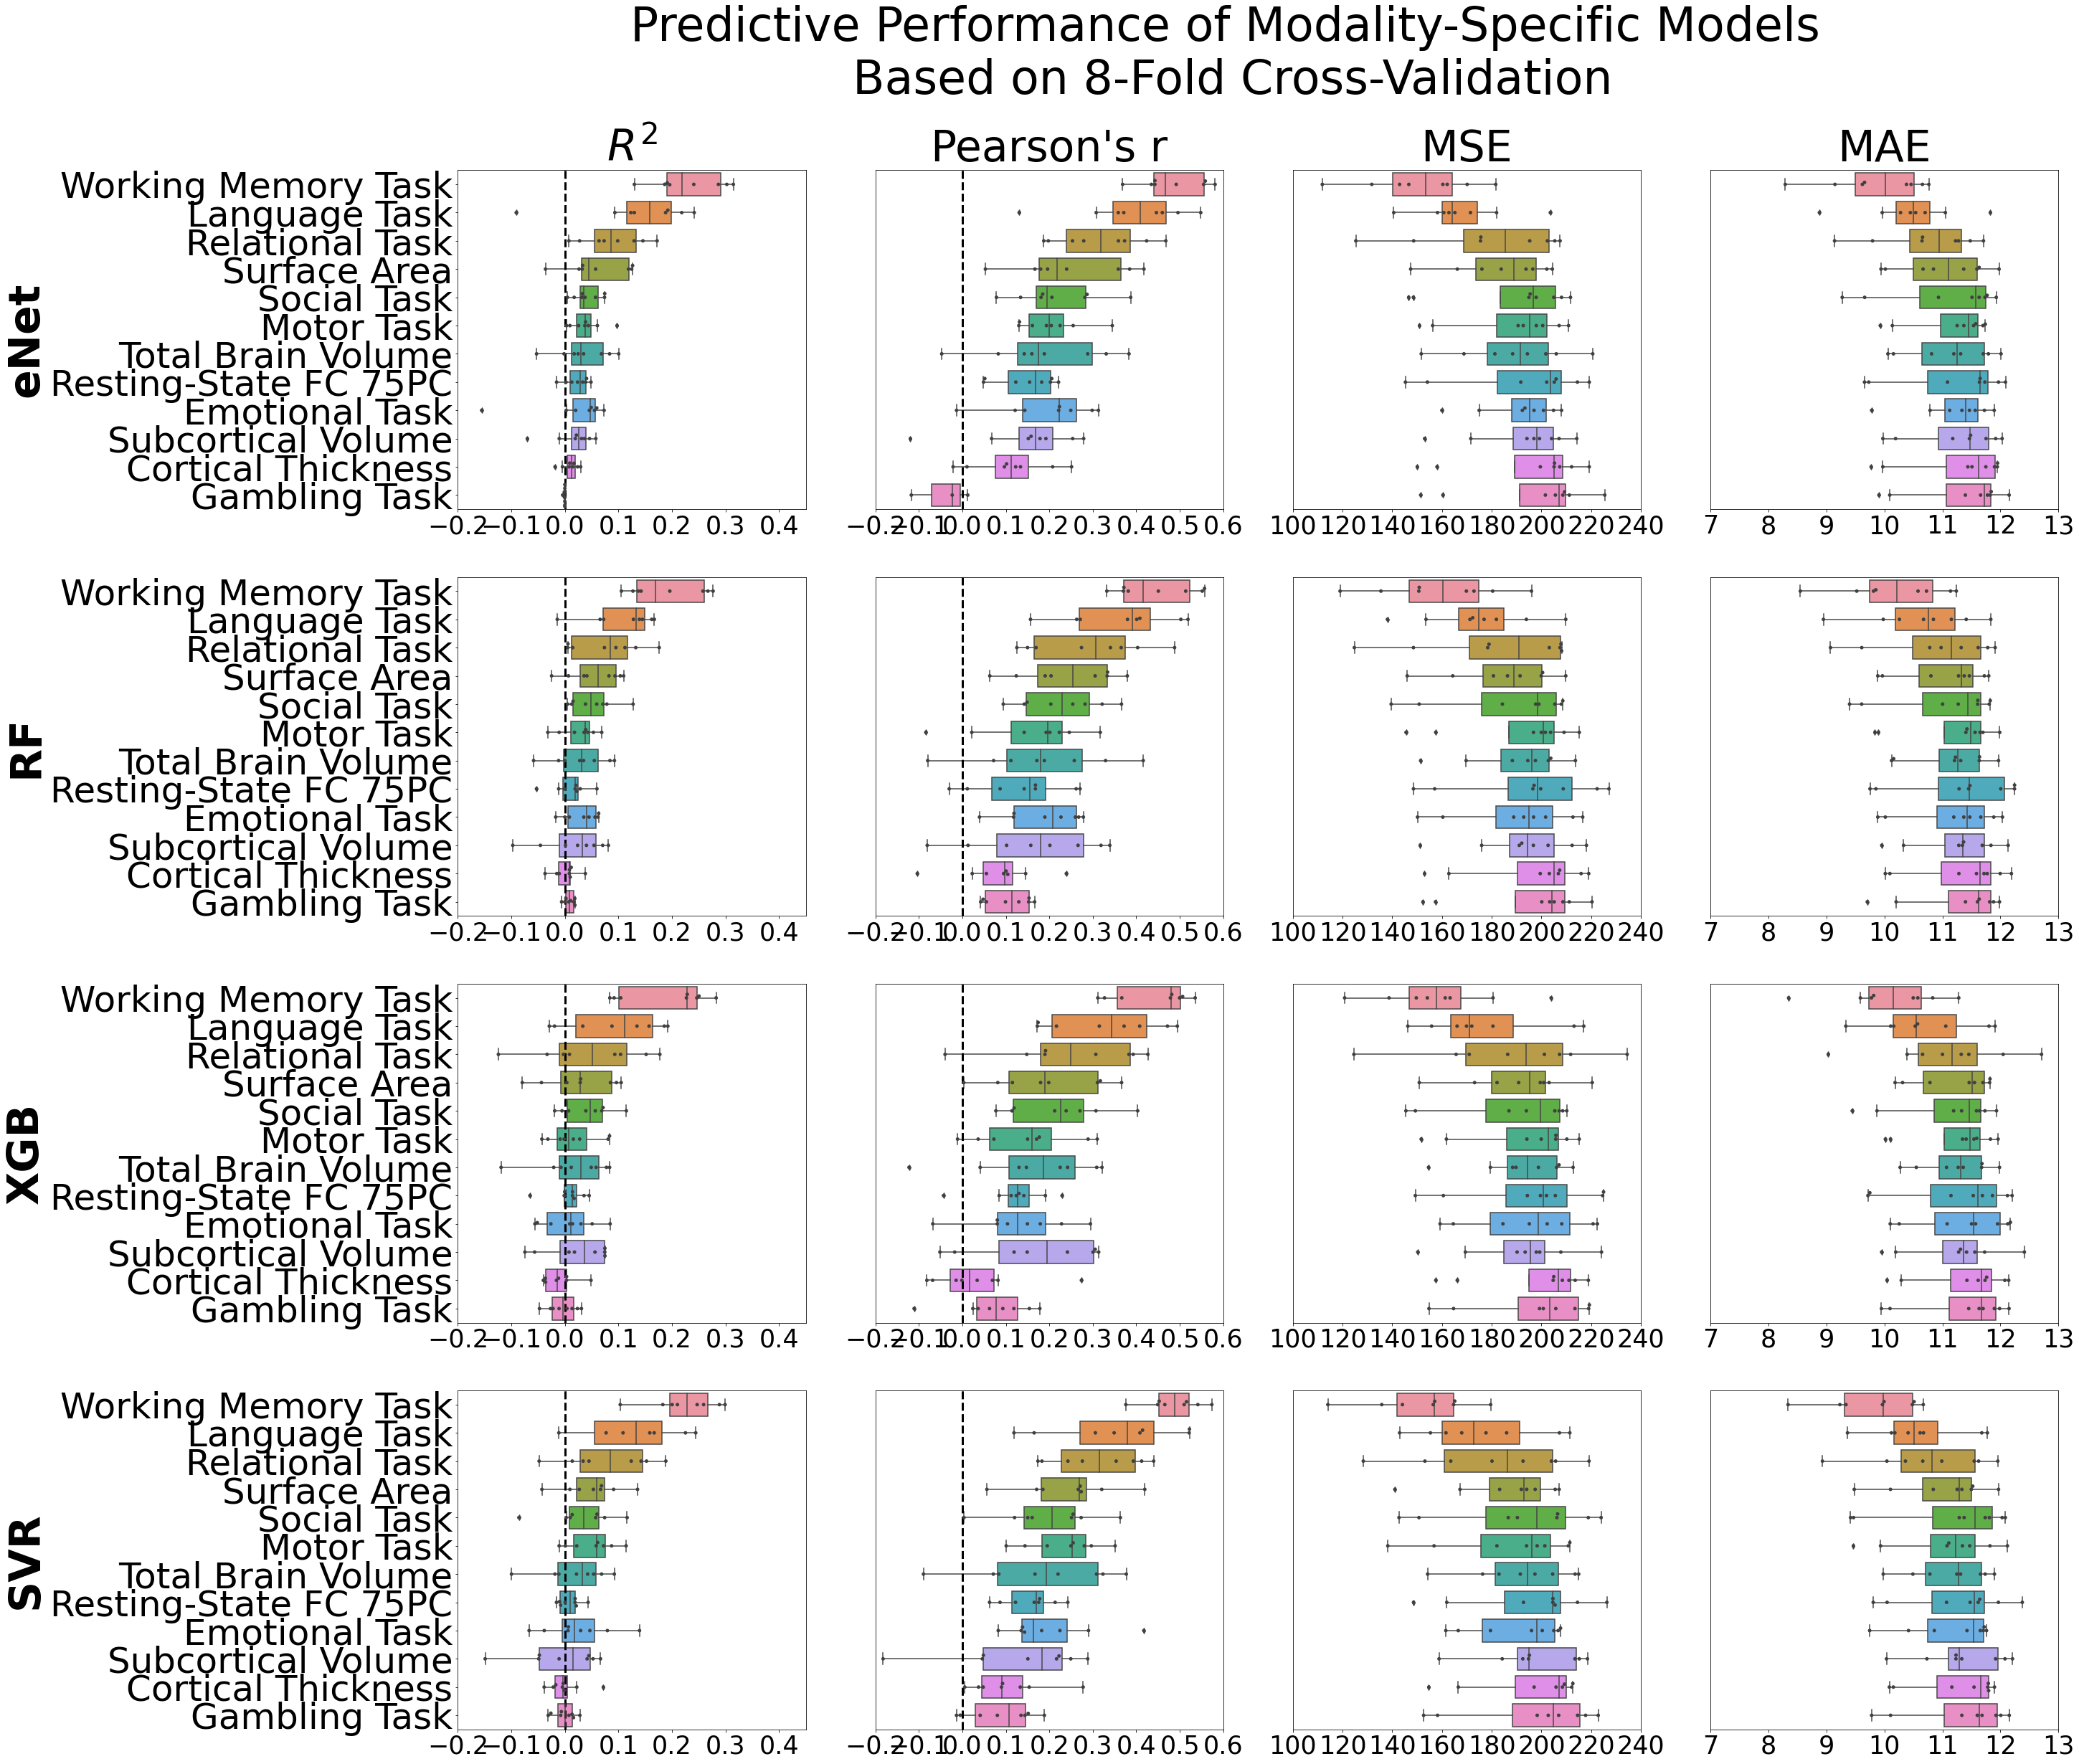

In [139]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(40,40))
palette = "Set1"
font1=28
font2=35
font3=50

plt.suptitle('Predictive Performance of Modality-Specific Models \nBased on 8-Fold Cross-Validation', fontsize=65, y=0.96)


df = copy.deepcopy(dct_cv['r2']['eNet'])

col_ord=df.mean().sort_values(ascending=False).index
#if INDEX in ['mae','mse']:
#    col_ord=df.mean().sort_values(ascending=True).index
#else:
#    col_ord=df.mean().sort_values(ascending=False).index


new_labels = []
for col in col_ord:
    if col in 'wm':
        new_labels += ['Working Memory Task']
    if col in 'lan':
        new_labels += ['Language Task']
    if col in 'rel':
        new_labels += ['Relational Task']
    if col in 'mot':
        new_labels += ['Motor Task']
    if col in 'emo':
        new_labels += ['Emotional Task']
    if col in 'soc':
        new_labels += ['Social Task']
    if col in 'gam':
        new_labels += ['Gambling Task']
    if col in 'rest-pca75':
        new_labels += ['Resting-State FC 75PC']
    if col in 'surf':
        new_labels += ['Surface Area']
    if col in 'VolBrain':
        new_labels += ['Total Brain Volume']
    if col in 'subc':
        new_labels += ['Subcortical Volume']
    if col in 'cort':
        new_labels += ['Cortical Thickness']



for INDEX, k in zip(INDEXes, range(4)):
    k=k+1


    for modtype, y in zip(['eNet', 'rf','xgb', 'svr'], [0,4,8,12]):
            if INDEX in ['mae']:
                lim = (7,13)
            if INDEX in ['r2']:
                lim = (-0.2, 0.45)
            if INDEX in ['cor']:
                lim = (-0.2,0.6)
            if INDEX in ['mse']:
                lim = (100,240)
             
            plt.subplot(4,4,k+y) #1

            if y==0:
                if INDEX == 'cor':
                    plt.title(str("Pearson's r"), fontsize=60) 
                elif INDEX == 'r2':
                    plt.title(str('$R^2$'), fontsize=60) 
                else:
                    plt.title(str(INDEX).upper(), fontsize=60)  
            
            
            data = dct_cv[INDEX][modtype].reindex(columns=col_ord)
            
            sns.boxplot(data = data, orient="h")
            sns.swarmplot(data = data, color=".25", orient="h", dodge=True)
                        
            
            plt.xlim(lim)
            plt.xticks(fontsize=font2)
            plt.xlabel('',fontsize=font3)

            if k+y in [1,5,9,13]:
                plt.yticks(np.arange(len(new_labels)), new_labels,fontsize=font3)
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)
                if modtype=='eNet':
                    plt.ylabel(modtype,fontsize=60, fontweight='bold')
                else:
                    plt.ylabel(modtype.upper(),fontsize=60, fontweight='bold')
            else:
                plt.ylabel('',fontsize=font3)
                plt.yticks([],fontsize=font3)
                
            if k+y in [2,6,10,14]:
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)

            
            plt.legend([],[], frameon=False)





#fig.tight_layout(pad=1)

#fig.supxlabel('$R^2$', fontsize=50)
#fig.supylabel('The First Layer Single Modality Algorithm', fontsize=65)

plt.show()